In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the sales data
sales_data = pd.read_csv("train.csv")

sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


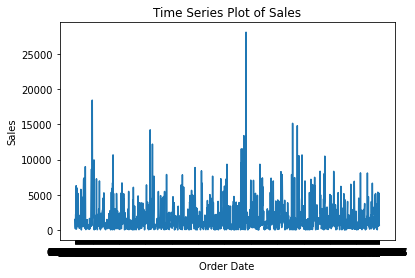

In [3]:
# Aggregate the sales data by date and create a time series dataset
sales_ts = sales_data.groupby("Order Date").sum()["Sales"]

# Plot the time series data to visualize trends and patterns
plt.plot(sales_ts)
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Time Series Plot of Sales")
plt.show()



In [5]:
# Split the time series data into training and test sets
train_size = int(len(sales_ts) * 0.7)
train, test = sales_ts[0:train_size], sales_ts[train_size:len(sales_ts)]

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit(disp=0)



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g.

In [6]:
import pickle

# Save the model to a file
filename = 'arima_model.pkl'
pickle.dump(model_fit, open(filename, 'wb'))

# Load the saved model from a file
loaded_model = pickle.load(open(filename, 'rb'))


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


RMSE:  2803.591580000024


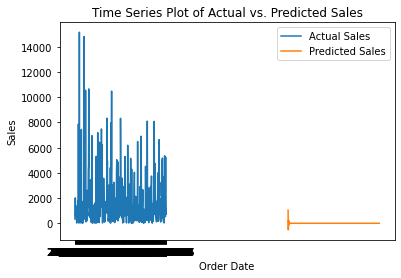

In [7]:
# Make predictions for the test data
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate the root mean squared error between the actual and predicted sales
rmse = np.sqrt(mean_squared_error(test, predictions))
print("RMSE: ", rmse)

# Plot the actual and predicted sales
plt.plot(test, label="Actual Sales")
plt.plot(predictions, label="Predicted Sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Time Series Plot of Actual vs. Predicted Sales")
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import r2_score

# Calculate the R^2 score
r2 = r2_score(test, predictions)
print("R^2:", r2)


R^2: -0.6475578324208895
